# Limpieza de datos - Análisis inicial de los datos

In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

#probar sin esto q no tengo claro lo q hce (no parece q haya diferencia)
%matplotlib inline

mainpath="/Users/pabloarranzropero/workspace-python/curso-ml-udemy/datasets"
filename="customer-churn-model/Customer Churn Model.txt"

data = pd.read_csv(os.path.join(mainpath, filename))
print(data.shape)
data.head()

(3333, 21)


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


### Scatter plot
Podemos crear gráficas de puntos para comprobar si dos variables están correlacionadas. <br>
Estas dos variables están correlacionadas.

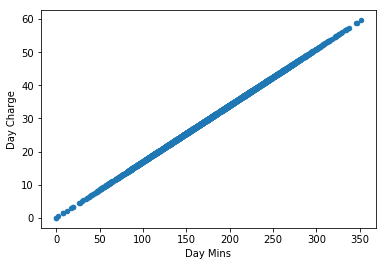

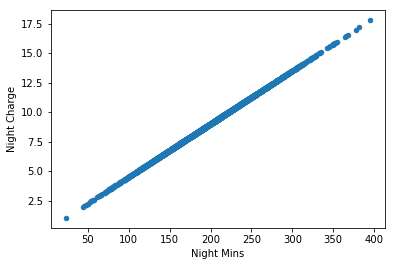

In [5]:
data.plot(kind="scatter", x="Day Mins", y="Day Charge")
data.plot(kind="scatter", x="Night Mins", y="Night Charge")

Para no eternizarnos haciendo combinaciones podemos obtener paneles con matplotlib. <br>
Por ejemplo, para ver todas las combinaciones posibles entre Day mins, Day charge, Night mins y Night charge, creamos una matriz de 2x2 donde las x y las y están compartidas:

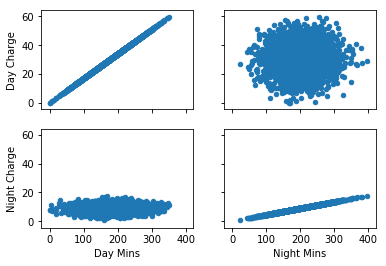

In [36]:
fig, axs = plt.subplots(2, 2, sharey=True, sharex=True)
data.plot(kind="scatter", x="Day Mins", y="Day Charge", ax = axs[0][0])      #con ax indicamos la posición del panel 
data.plot(kind="scatter", x="Day Mins", y="Night Charge", ax = axs[1][0])
data.plot(kind="scatter", x="Night Mins", y="Day Charge", ax = axs[0][1])
data.plot(kind="scatter", x="Night Mins", y="Night Charge", ax = axs[1][1])

#fig.savefig("./subplots-daynight-nmincharge.jpeg")
#asi podemos guardar las gráficas para compartirlas

### Histogramas
De esta manera podemos ver los rangos, la distribución, moda, etc...<br>
Se muestra para los valores de una variable el número de ocurrencias en el dataset

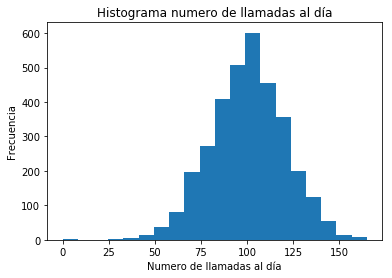

In [47]:
plt.hist(data["Day Calls"], bins=20)      #con bins podemos elegir las divisiones que se hacen (las barras)
#tambien podemos con bins decirle en que numero queremos las divisiones en vez de cuantas queremos
#plt.hist(data["Day Calls"], bins=[0,30,60,90,120,150])
plt.xlabel("Numero de llamadas al día")
plt.ylabel("Frecuencia")
plt.title("Histograma numero de llamadas al día")

Para saber cuantas divisiones hay que realizar en un histograma se usa la regla de Sturges<br>
https://es.wikipedia.org/wiki/Regla_de_Sturges

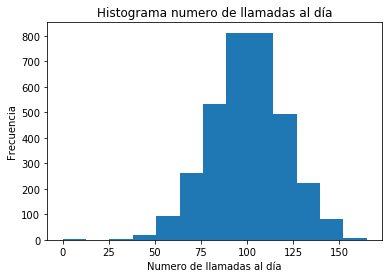

In [7]:
k = np.ceil(1 + np.log2(data.shape[0]))
plt.hist(data["Day Calls"], bins=int(k))      #con bins podemos elegir las divisiones que se hacen (las barras)

#tambien podemos con bins decirle en que numero queremos las divisiones en vez de cuantas queremos
#plt.hist(data["Day Calls"], bins=[0,30,60,90,120,150])

plt.xlabel("Numero de llamadas al día")
plt.ylabel("Frecuencia")
plt.title("Histograma numero de llamadas al día")

### Boxplot. Diagrama de caja y bigotes
De la caja hacia abajo es el percentil 25 y de la caja hacia arriba es el percentil 75.<br>
La caja es del 25 al 75 y la raya indica el percentil 50. (La mediana)<br>
La altura de la caja es el rango intercuartílico (IQR) que se calcula restando el percentil 75 - el percentil 25.<br>
Los bigotes se pintan (Como máximo, si hay valores más allá) a 1.5 * IQR. Lo que quede fuera se pinta con circulos y se llama outliers.


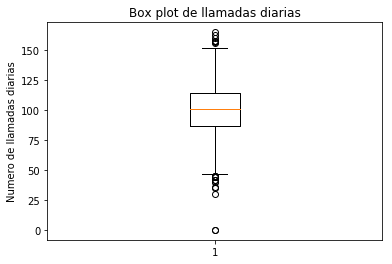

In [12]:
plt.boxplot(data["Day Calls"])
plt.ylabel("Numero de llamadas diarias")
plt.title("Box plot de llamadas diarias")